In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from lightkurve import search_lightcurvefile
from requests.exceptions import HTTPError
from astropy.coordinates import SkyCoord
from astroquery.mast import Tesscut
from astropy.timeseries import LombScargle
from photutils import CircularAperture, aperture_photometry
from scipy.ndimage import gaussian_filter1d

import astropy.units as u

ngc6811 = Table.read('../data/apjab2393t1_mrt.txt', format='cds')

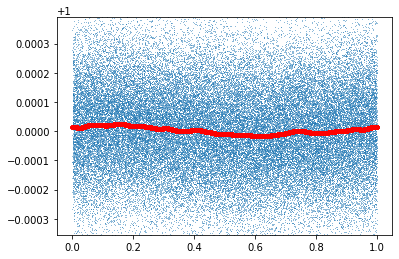

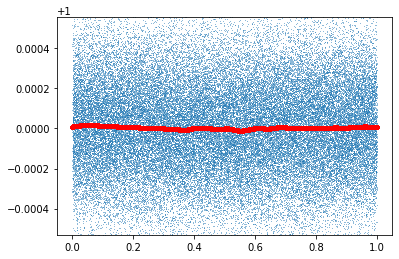

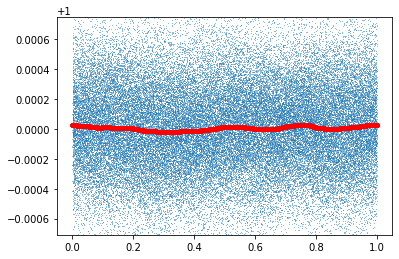

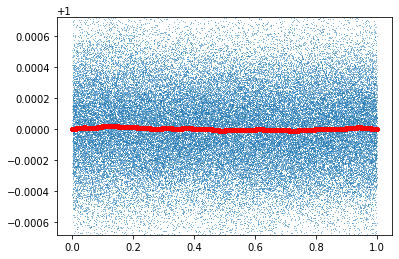

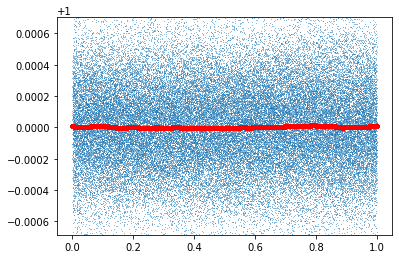

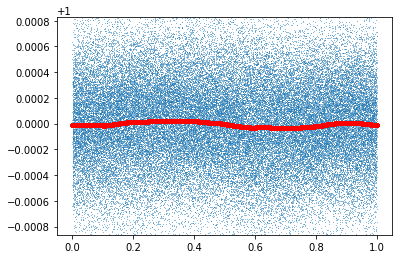

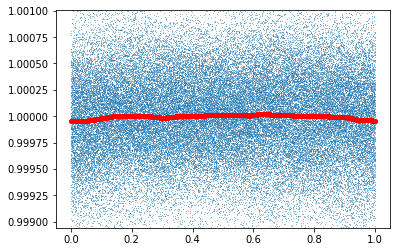

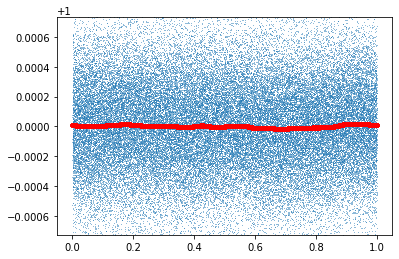

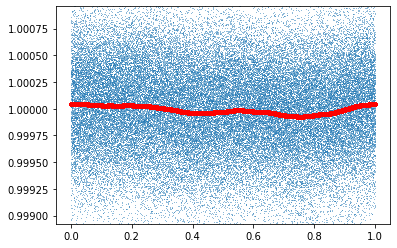

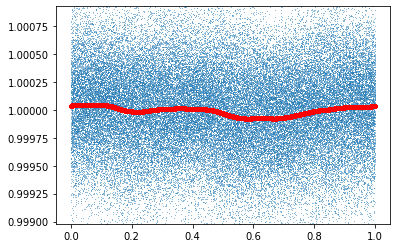

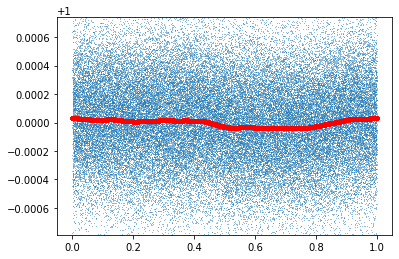

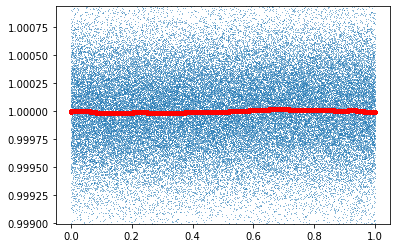

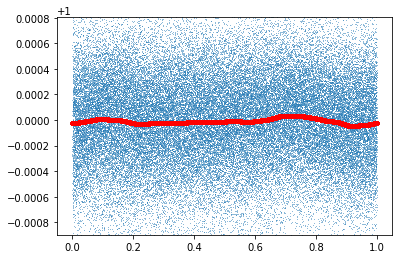

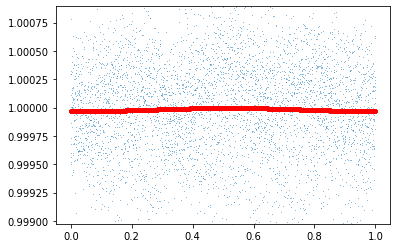

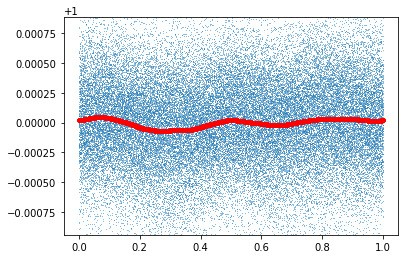

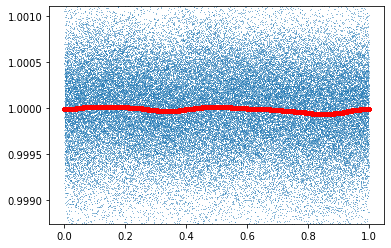

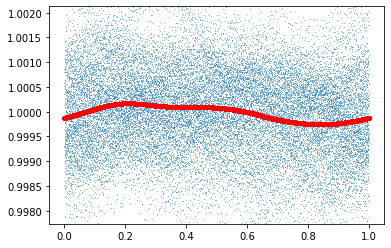

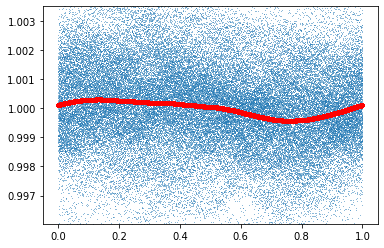

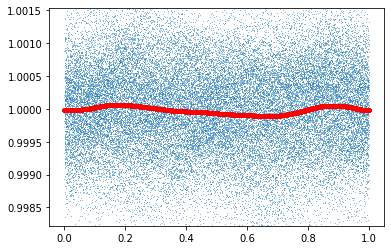

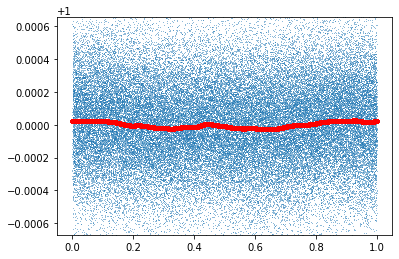

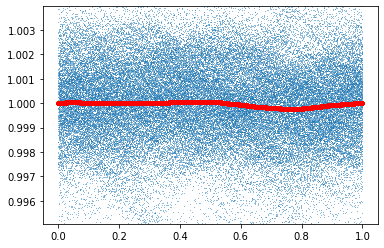

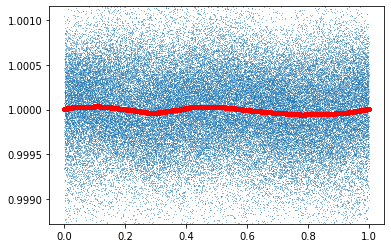

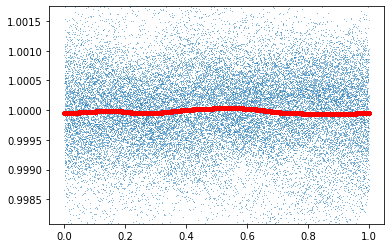

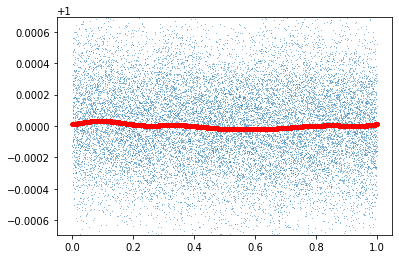

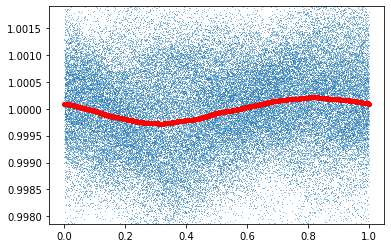

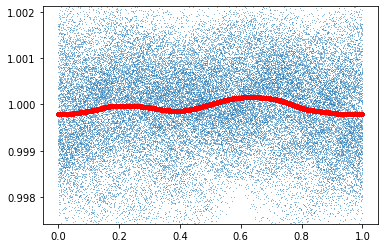

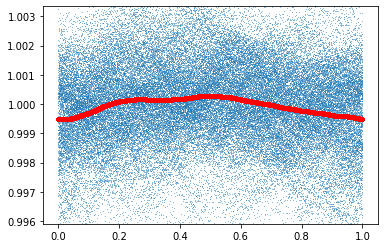

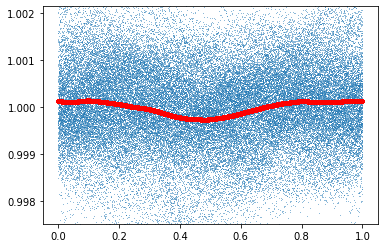

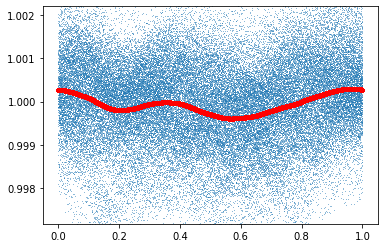

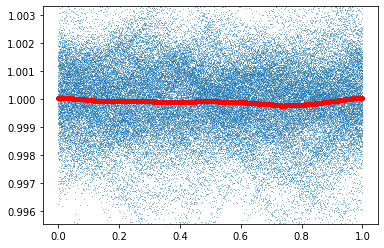

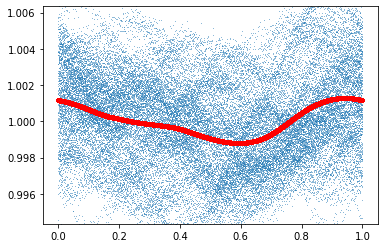

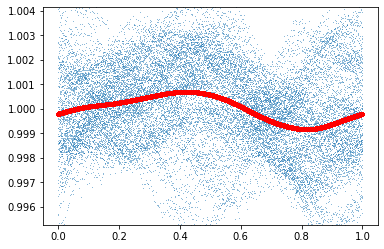

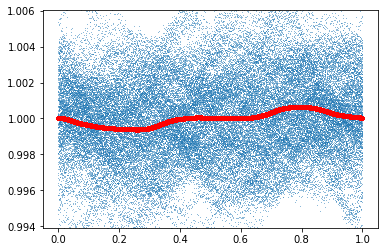

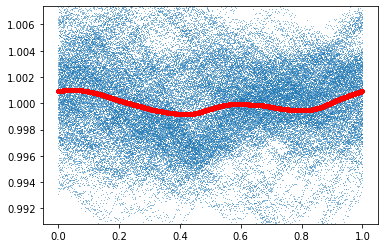

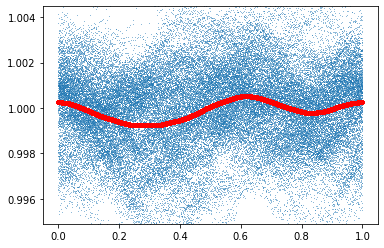

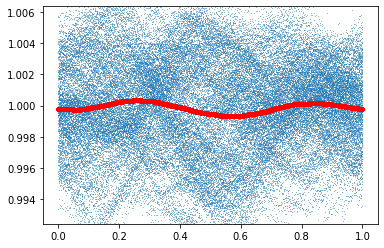

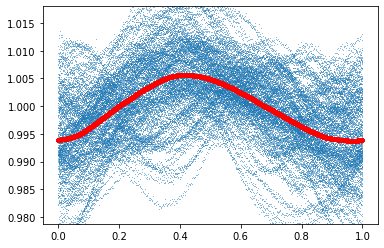

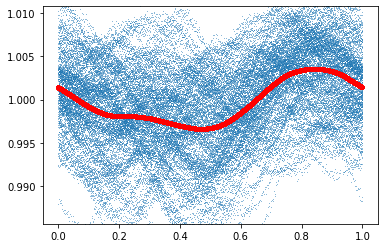

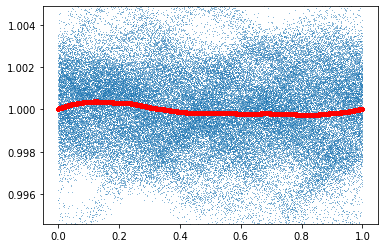

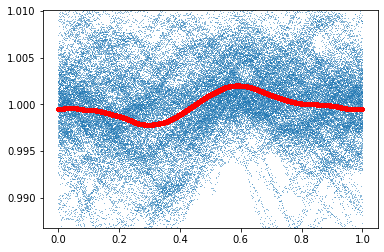

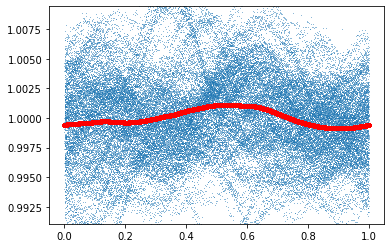

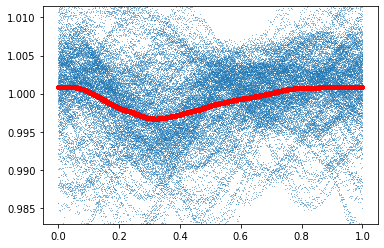

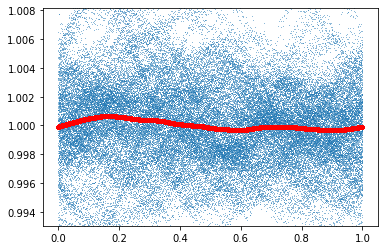

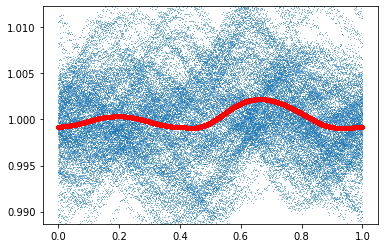

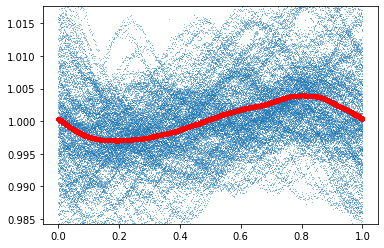

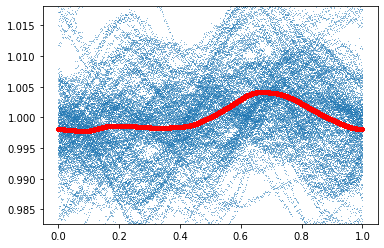

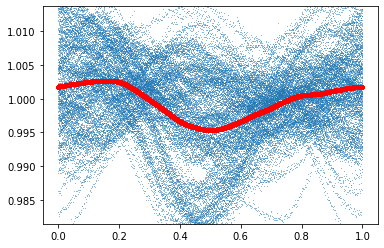

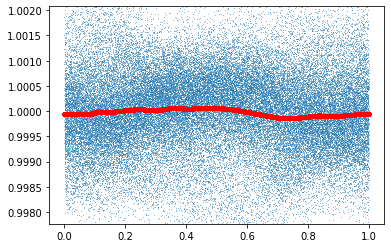

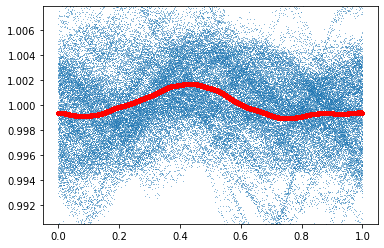

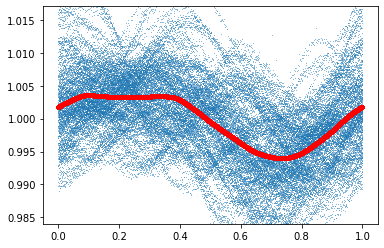

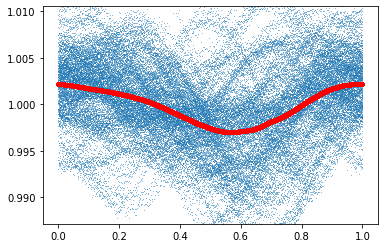

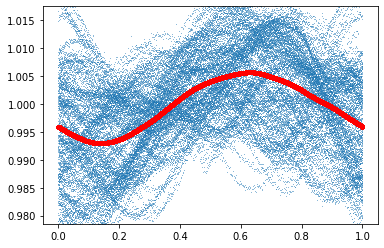

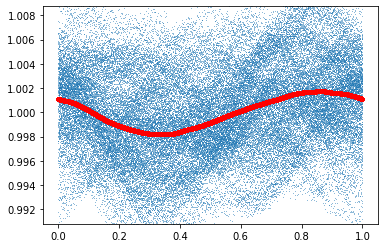

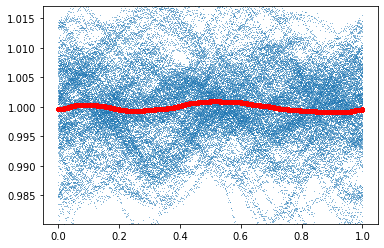

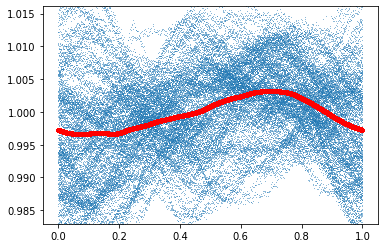

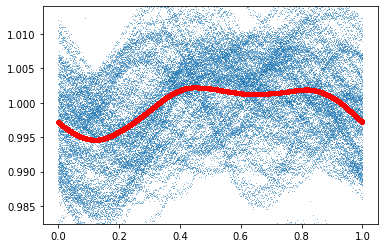

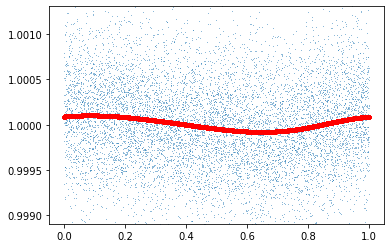

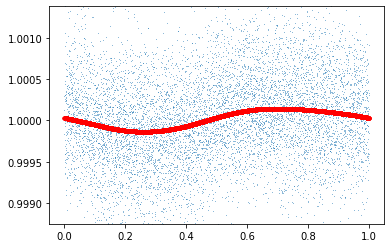

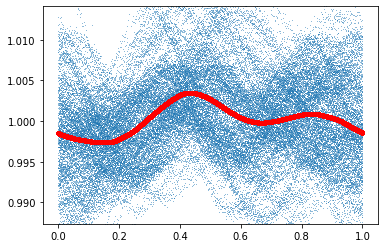

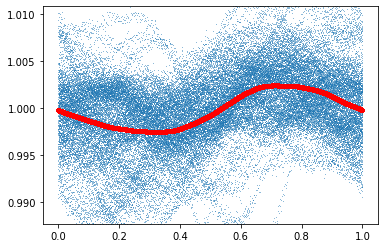

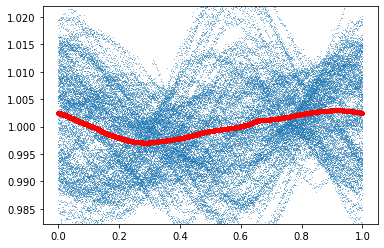

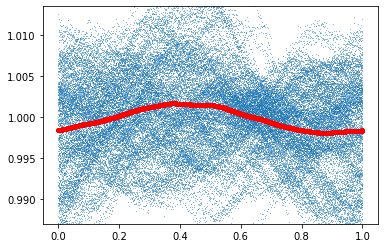

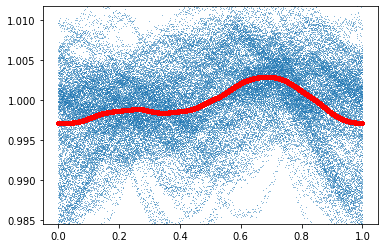

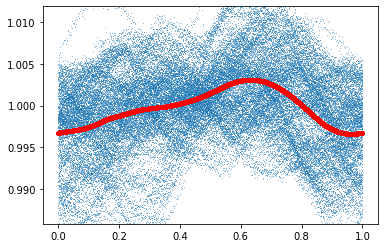

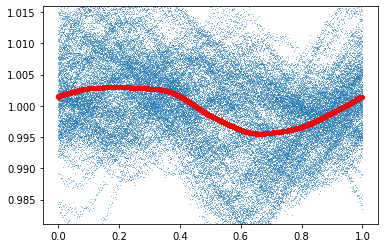

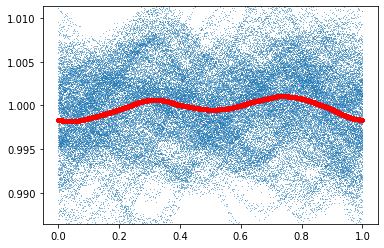

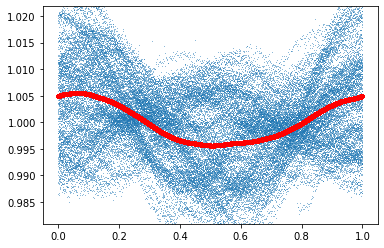

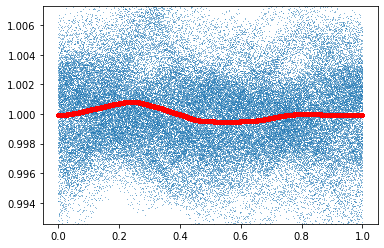

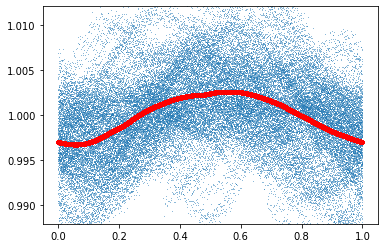

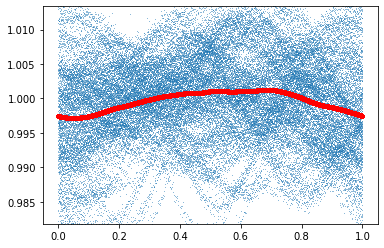

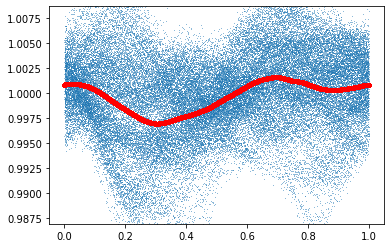

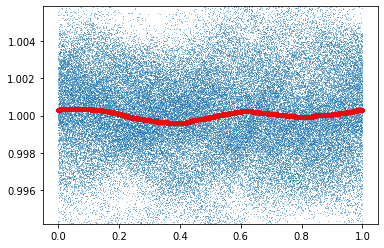

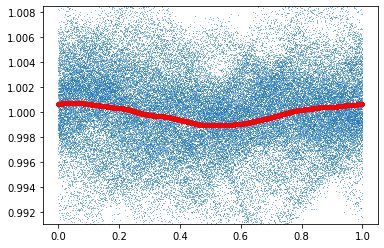

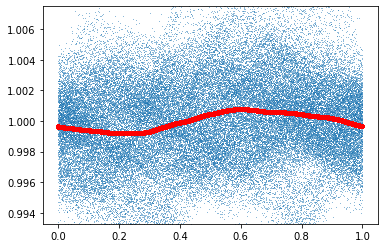

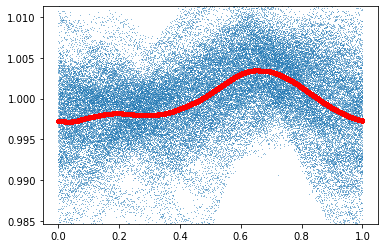

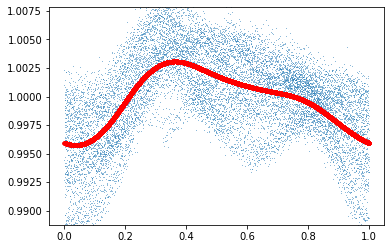

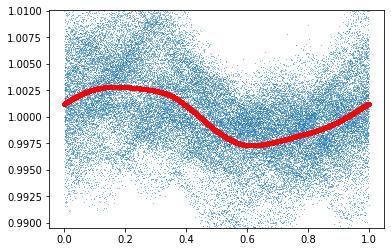

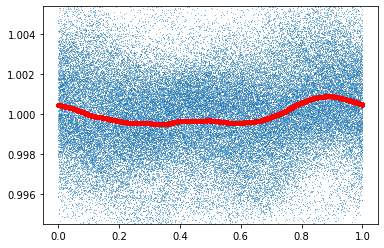

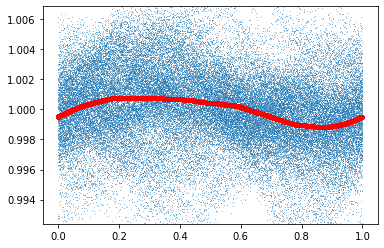

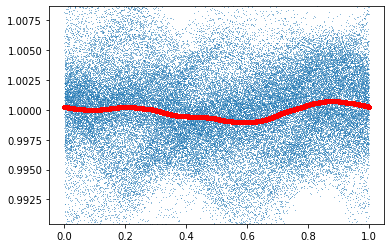

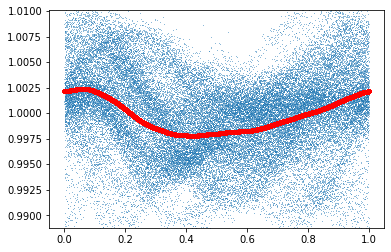

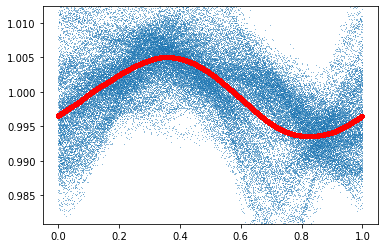

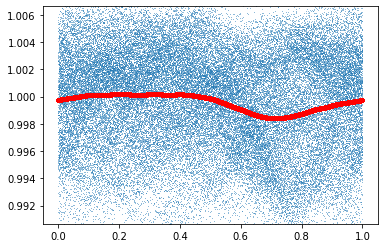

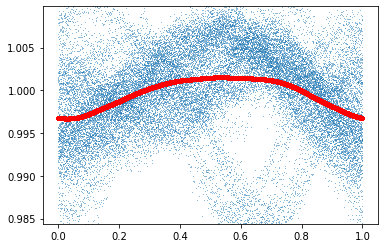

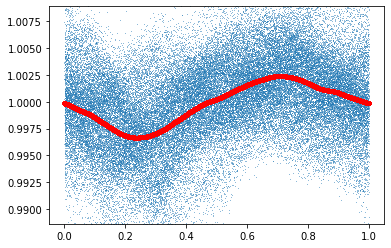

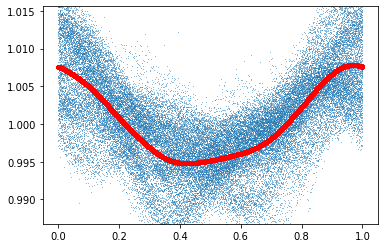

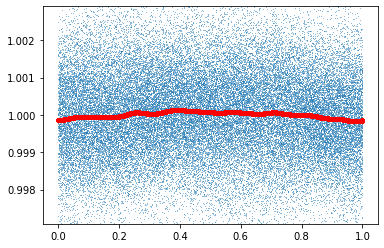

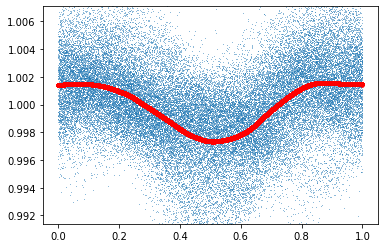

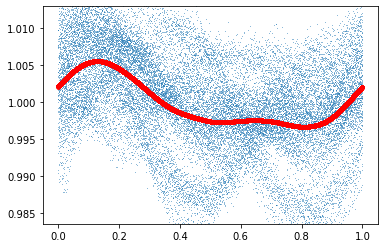

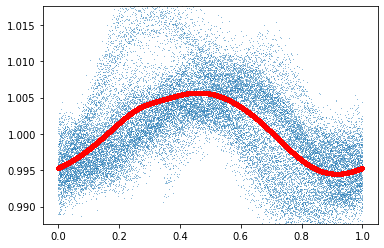

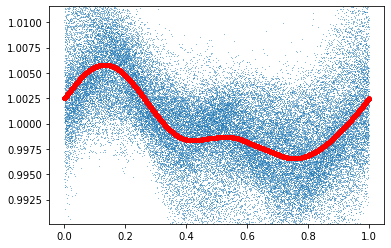

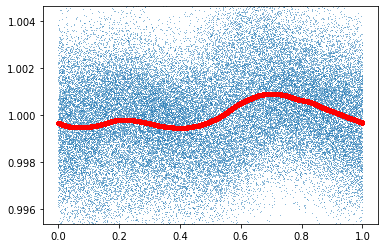

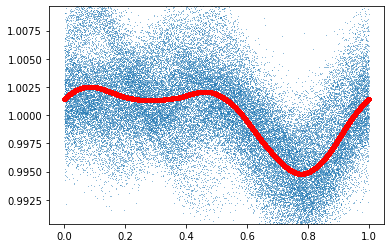

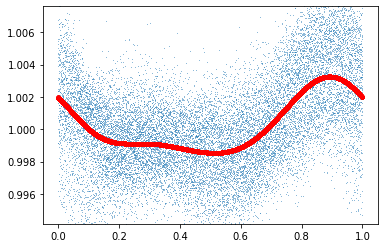

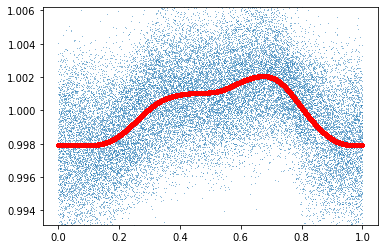

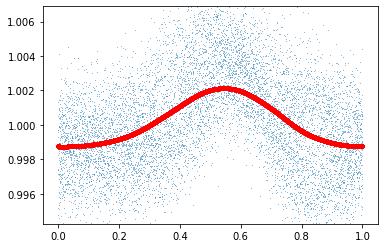

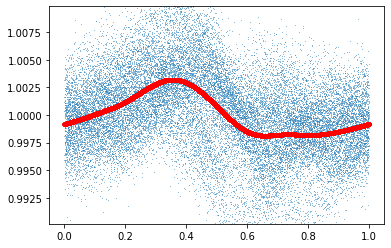

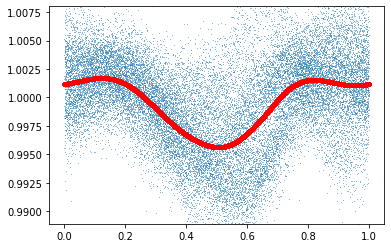

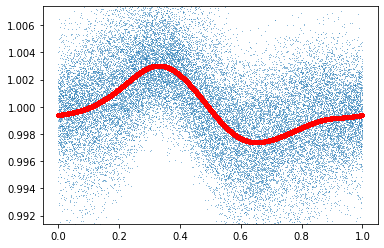

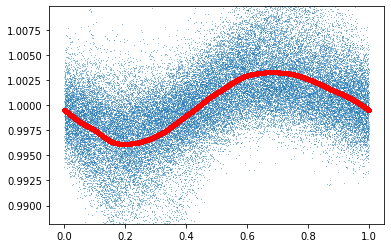

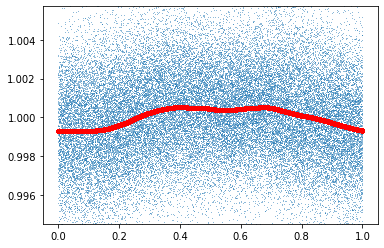

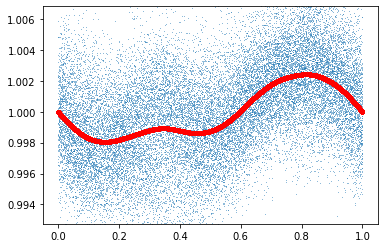

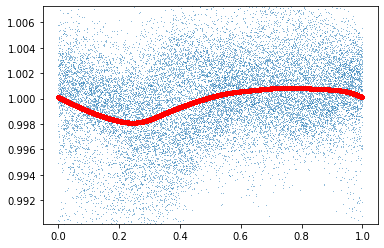

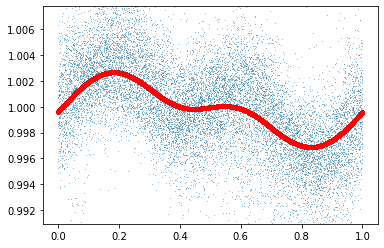

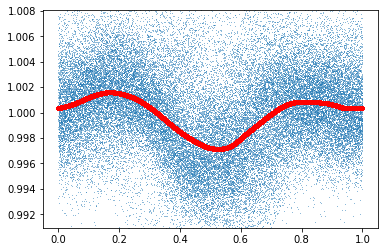

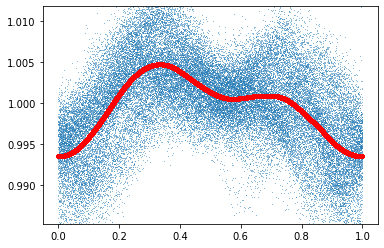

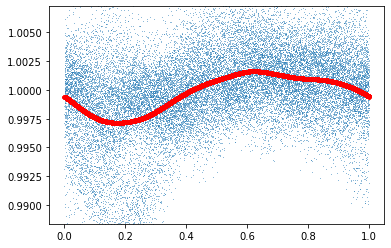

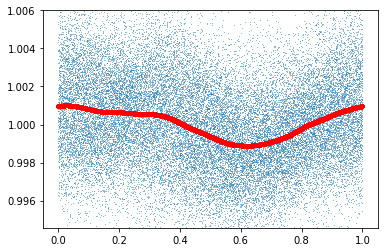

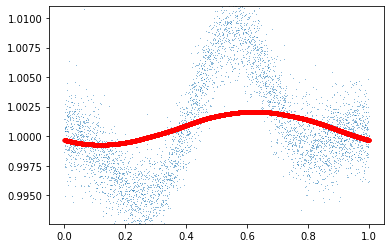

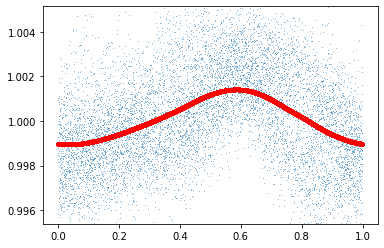

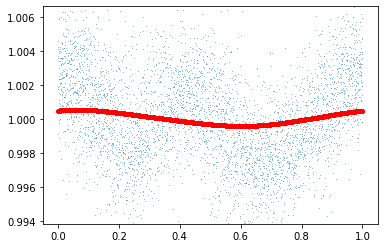

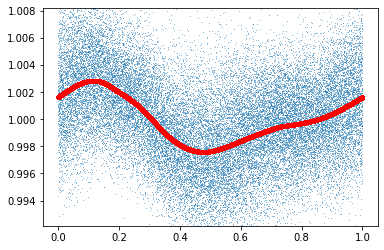

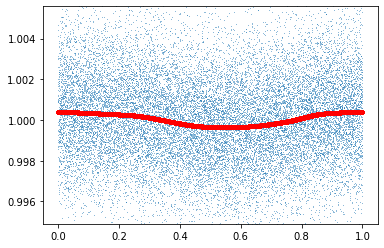

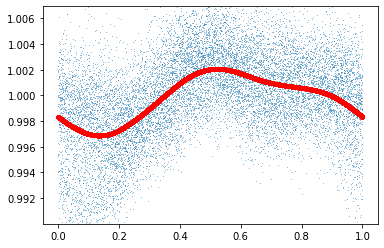

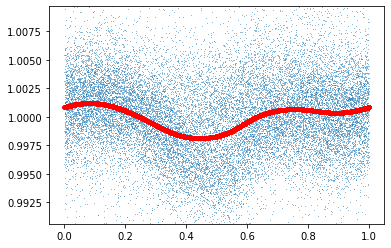

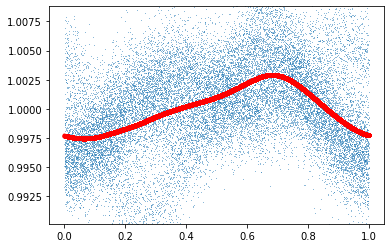

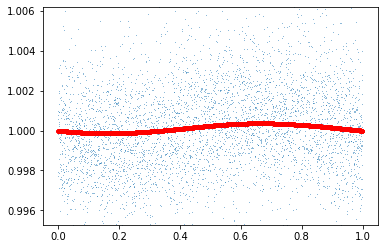

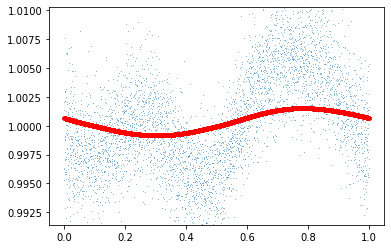

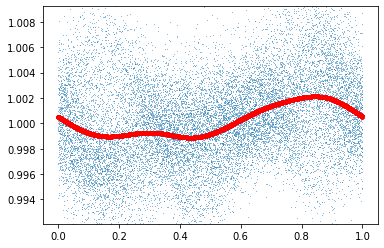

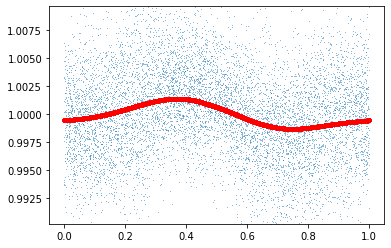

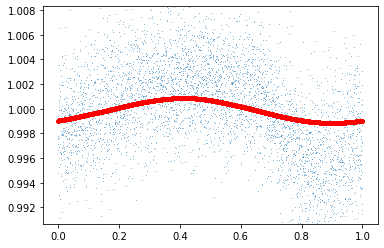

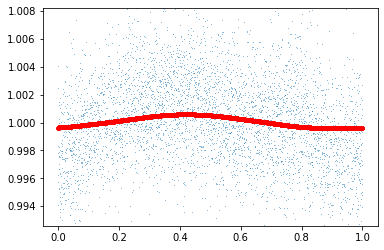

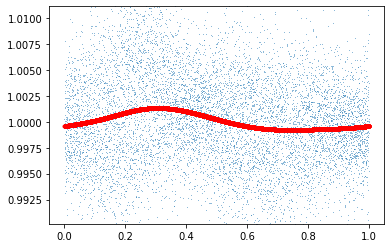

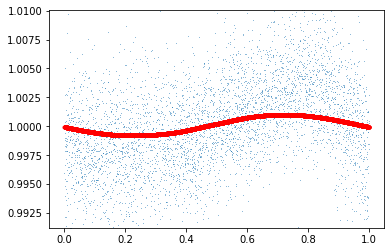

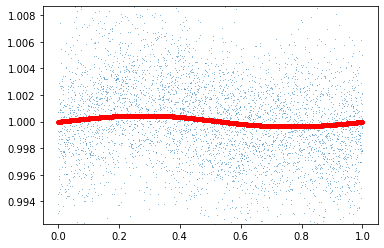

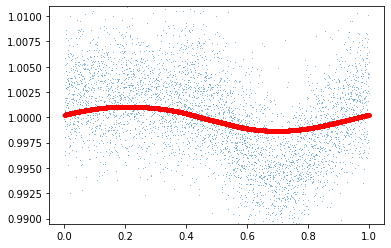

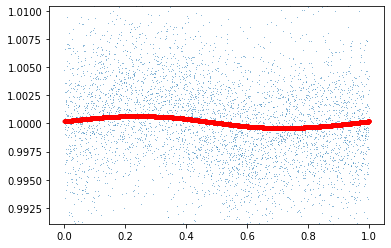

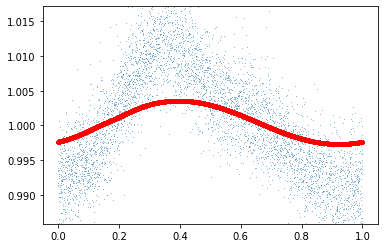

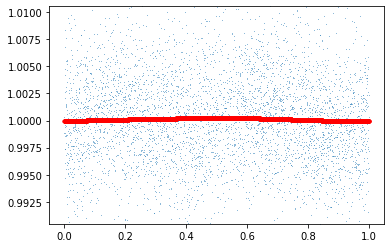

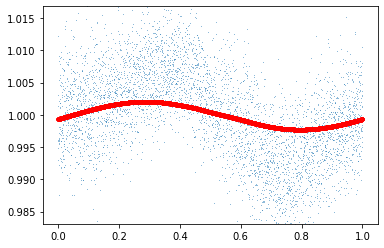

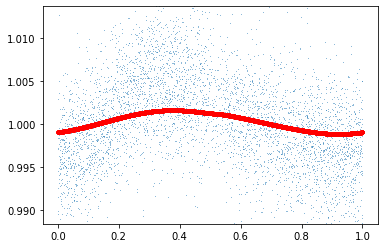

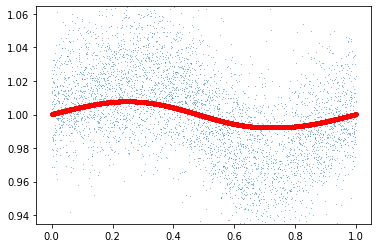

In [5]:
from lightkurve import search_lightcurvefile

ngc6811_smamps = []

for target, prot in zip(ngc6811['KIC'], ngc6811['Per']):
    try: 
        slcf = search_lightcurvefile("KIC {0}".format(target), mission='Kepler')
        lc = slcf.download_all()
        pdcsap = lc.PDCSAP_FLUX.stitch()

        phases = (((pdcsap.time - 0) % prot) / prot)

        not_nan = ~np.isnan(pdcsap.flux)
        smoothed = gaussian_filter1d(pdcsap.flux[not_nan][np.argsort(phases[not_nan])], 1000, mode='wrap')

        plt.plot(phases, pdcsap.flux, ',', alpha=0.5)
        plt.plot(phases[not_nan][np.argsort(phases[not_nan])], smoothed, '.r')
        plt.ylim(np.nanpercentile(pdcsap.flux, [1, 99]))
        plt.show()
        
        ngc6811_smamps.append(smoothed.ptp())
        
    except ValueError:
        ngc6811_smamps.append(np.nan)

In [6]:
np.save('data/ngc_amps.npy', ngc6811_smamps)
np.save('data/ngc_pers.npy', ngc6811['Per'])